/Users/aahanthapliyal/anaconda3/envs/ece537-venv/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
dyld[32023]: Library not loaded: @rpath/libvorbis.0.4.9.dylib
  Referenced from: <B8AFEFA0-D6D6-3655-BAD9-2276336E3BC2> /Users/aahanthapliyal/anaconda3/envs/ece537-venv/lib/libsox.dylib
  Reason: tried: '/Users/aahanthapliyal/anaconda3/envs/ece537-venv/lib/libvorbis.0.4.9.dylib' (no such file), '/Users/aahanthapliyal/anaconda3/envs/ece537-venv/bin/../lib/libvorbis.0.4.9.dylib' (no such file), '/Users/aahanthapliyal/anaconda3/envs/ece537-venv/bin/../lib/libvorbis.0.4.9.dylib' (no such file), '/usr/local/lib/libvorbis.0.4.9.dylib' (no such file), '/usr/lib/libvorbis.0.4.9.dylib' (no such file, not in dyld cache)
SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge

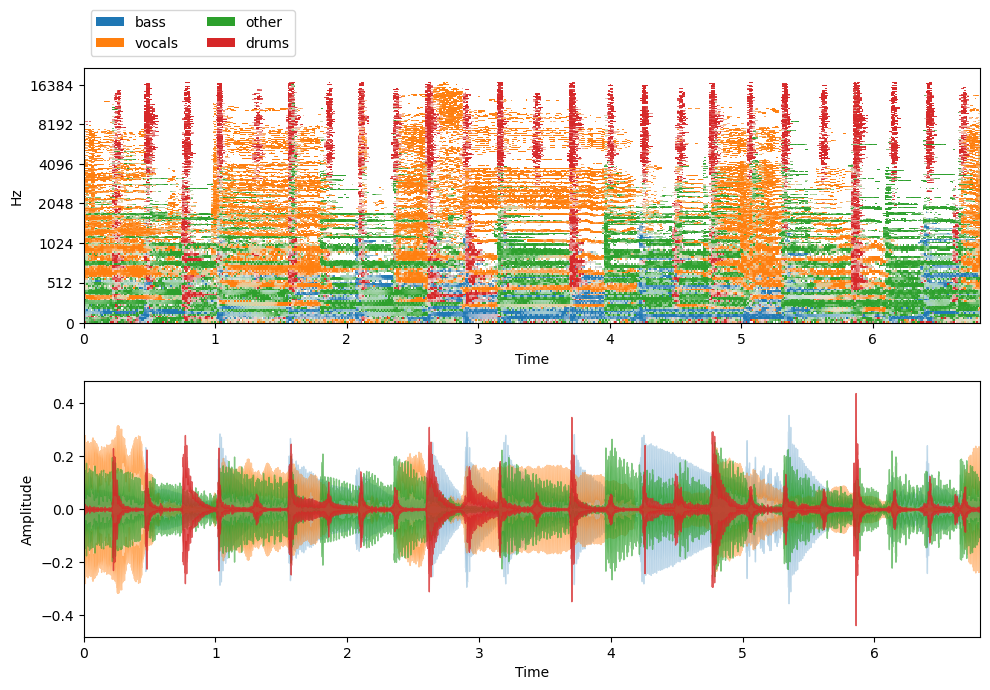


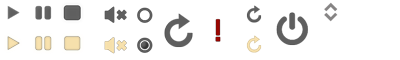
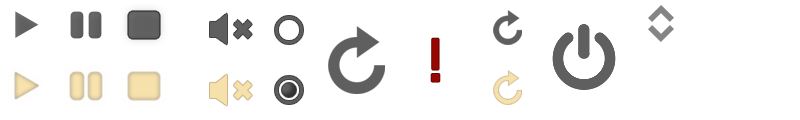
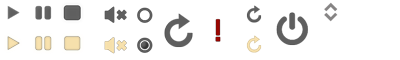

In [1]:
import nussl
import numpy as np
# import os
# os.environ["MPLBACKEND"] = "agg"
import matplotlib.pyplot as plt
import json
import time

start_time = time.time()

# seed this notebook
nussl.utils.seed(0)

# this will download the 7 second clips from MUSDB
musdb = nussl.datasets.MUSDB18(download=True)
i = 40 #or get a random track like this: np.random.randint(len(musdb))

# helper for plotting and playing
def visualize_and_embed(sources):
    plt.figure(figsize=(10, 7))
    plt.subplot(211)
    nussl.utils.visualize_sources_as_masks(
        sources, db_cutoff=-60, y_axis='mel')
    plt.subplot(212)
    nussl.utils.visualize_sources_as_waveform(
        sources, show_legend=False)
    plt.tight_layout()
    plt.show()

    nussl.play_utils.multitrack(sources, ext='.wav')

item = musdb[i]
mix = item['mix']
sources = item['sources']

visualize_and_embed(sources)

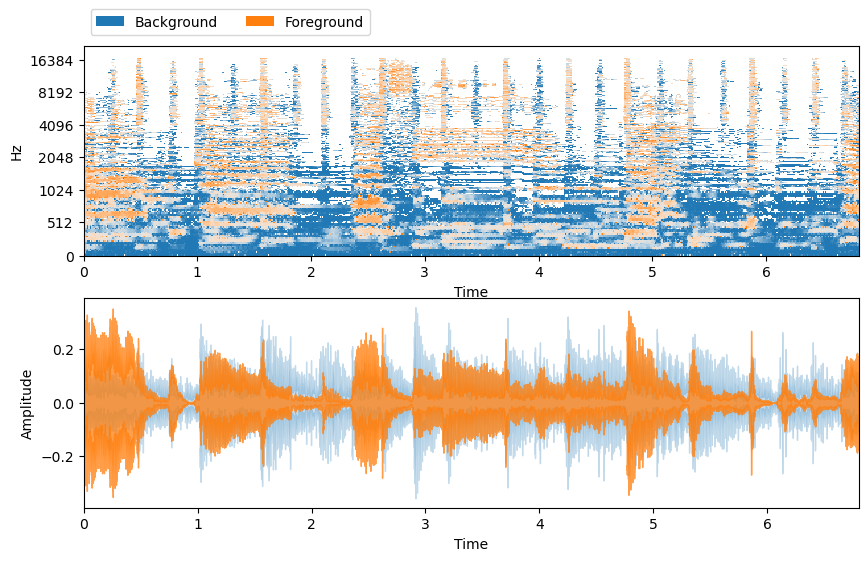

ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with clang version 17.0.6
  configuration: --prefix=/Users/aahanthapliyal/anaconda3/envs/ece537-venv --cc=x86_64-apple-darwin13.4.0-clang --cxx=x86_64-apple-darwin13.4.0-clang++ --nm=x86_64-apple-darwin13.4.0-nm --ar=x86_64-apple-darwin13.4.0-ar --disable-doc --enable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-videotoolbox --disable-gnutls --enable-libmp3lame --enable-libvpx --enable-libass --enable-pthreads --enable-libopenvino --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libopus --pkg-config=/Users/runner/miniforge3/conda-bld/ffmpeg_1728332269625/_build_env/bin/pkg-config
  libavutil      59. 39.100 / 59. 39.100
  libavcodec     61. 19.100 / 61. 19.1


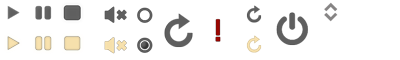
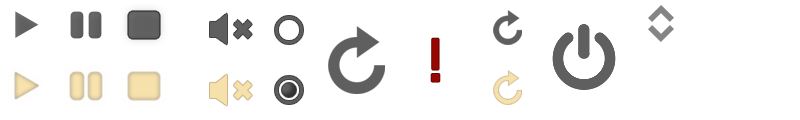
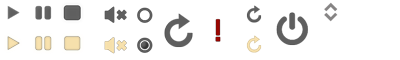

In [5]:
ft2d = nussl.separation.primitive.FT2D(mix)
ft2d_estimates = ft2d()
visualize_and_embed(ft2d_estimates)

In [3]:
# TESTING WITH COMBINING FOREGRAOUND AND BACKGROUND

from pydub import AudioSegment
from pydub.playback import play

forData_dir = '../n20em_v1.0/data/1.19.a-2-00/downsample_accomp.wav'
bacData_dir = '../n20em_v1.0/data/1.19.a-2-00/downsample_audio.wav'

# Load the audio files
foreground = AudioSegment.from_file(file=forData_dir, format='wav')
background = AudioSegment.from_file(file=bacData_dir, format='wav')

# Adjust the volume if needed
foreground = foreground  # Increase vocals by 3 dB
background = background  # Decrease background music by 3 dB

# Overlay the audio files
combined = background.overlay(foreground, position=0)

file_handle = combined.export("test.wav", format="wav")

# # Play the combined audio
# play(combined)




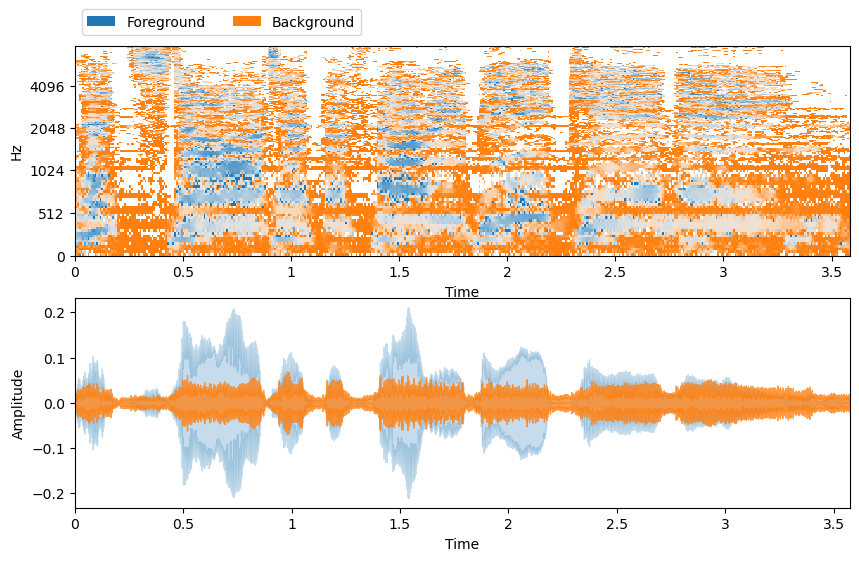

ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with clang version 17.0.6
  configuration: --prefix=/Users/aahanthapliyal/anaconda3/envs/ece537-venv --cc=x86_64-apple-darwin13.4.0-clang --cxx=x86_64-apple-darwin13.4.0-clang++ --nm=x86_64-apple-darwin13.4.0-nm --ar=x86_64-apple-darwin13.4.0-ar --disable-doc --enable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-videotoolbox --disable-gnutls --enable-libmp3lame --enable-libvpx --enable-libass --enable-pthreads --enable-libopenvino --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libopus --pkg-config=/Users/runner/miniforge3/conda-bld/ffmpeg_1728332269625/_build_env/bin/pkg-config
  libavutil      59. 39.100 / 59. 39.100
  libavcodec     61. 19.100 / 61. 19.1


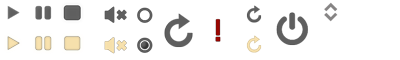
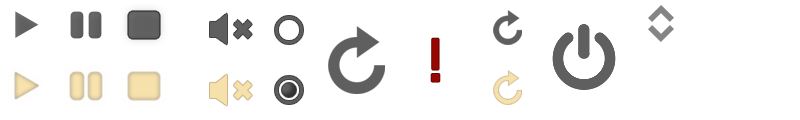
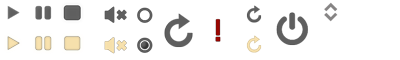

In [12]:
import nussl
import matplotlib.pyplot as plt
import time

start_time = time.time()

def visualize_and_embed(estimates):
    plt.figure(figsize=(10, 6))
    plt.subplot(211)
    nussl.utils.visualize_sources_as_masks({
        'Background': estimates[0], 'Foreground': estimates[1]},
        y_axis='mel', db_cutoff=-60, alpha_amount=2.0)

    plt.subplot(212)
    nussl.utils.visualize_sources_as_waveform({
        'Background': estimates[0], 'Foreground': estimates[1]},
        show_legend=False)
    plt.show()
    nussl.play_utils.multitrack(estimates, ['Background', 'Foreground'])

# audio_path = nussl.efz_utils.download_audio_file(
#     'schoolboy_fascination_excerpt.wav')
# audio_signal = nussl.AudioSignal(audio_path)
audio_signal = nussl.AudioSignal('test.wav')

ft2d = nussl.separation.primitive.FT2D(
    audio_signal, mask_type='soft', mask_threshold=0.99, high_pass_cutoff=50)
estimates = ft2d()

visualize_and_embed(estimates)